1. Create Dummy Data for Classification
2. Classify Dummy Data
3. Breakdown of Metrics Included in Classification Report

### 1. Create Dummy Data for Classification

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs, load_iris
from sklearn.model_selection import train_test_split


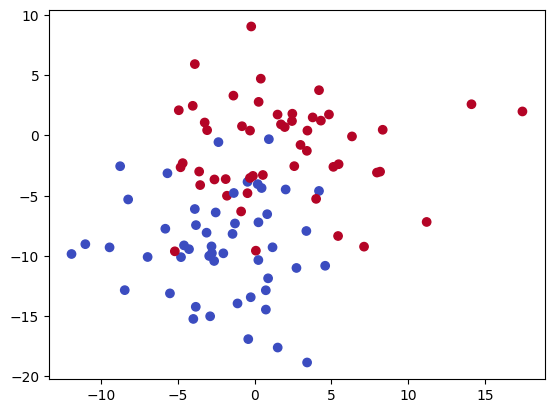

In [2]:
data, labels = make_blobs(n_samples=100, n_features=2, centers=2,cluster_std=4,random_state=2)

plt.scatter(data[:,0], data[:,1], c = labels, cmap='coolwarm');

### 2. Classify Data

In [3]:
#Import LinearSVC
from sklearn.svm import LinearSVC

X_train = data[:70]
y_train = labels[:70]
X_test = data[70:]
y_test = labels[70:]

#Create instance of Support Vector Classifier
svc = LinearSVC()

#Fit estimator to 70% of the data
svc.fit(X_train, y_train)

#Predict final 30%
y_pred = svc.predict(X_test)

#Establish true y values
y_true = y_test

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 3. Metrics

#### Accuracy Score

In [4]:
from sklearn.metrics import accuracy_score

print("Accuracy score: {}".format(accuracy_score(y_true, y_pred)))

Accuracy score: 0.9


#### Precision Score

TP - True Positives<br>
FP - False Positives<br>

Precision - Accuracy of positive predictions.<br>
Precision = TP/(TP + FP)

In [5]:
from sklearn.metrics import precision_score

print("Precision score: {}".format(precision_score(y_true, y_pred)))

Precision score: 0.9285714285714286


#### Recall Score

FN - False Negatives<br>

Recall (aka sensitivity or true positive rate): Fraction of positives That were correctly identified.<br>
Recall = TP/(TP+FN)

In [6]:
from sklearn.metrics import recall_score

print("Recall score: {}".format(recall_score(y_true, y_pred)))

Recall score: 0.8666666666666667


#### F1 Score

F1 Score (aka F-Score or F-Measure) - A helpful metric for comparing two classifiers. F1 Score takes into account precision and the recall. It is created by finding the the harmonic mean of precision and recall.

F1 = 2 x (precision x recall)/(precision + recall)

In [7]:
from sklearn.metrics import f1_score

print("F1 Score: {}".format(f1_score(y_true, y_pred)))

F1 Score: 0.896551724137931


In [8]:
f1_score??

#### Classification Report

Report which includes Precision, Recall and F1-Score.

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.93      0.87      0.90        15

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



#### Confusion Matrix
Confusion matrix allows you to look at the particular misclassified examples yourself and perform any further calculations as desired.

In [10]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
#Create instance of Support Vector Classifier
svc = LinearSVC(C=1000)

#Fit estimator to 80% of the data
svc.fit(X_train, y_train)

#Predict final 20%
y_pred = svc.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.75      1.00      0.86         9
           2       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.90        30
weighted avg       0.93      0.90      0.90        30



In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, normalize='all')
cm

array([[0.33333333, 0.        , 0.        ],
       [0.        , 0.3       , 0.        ],
       [0.        , 0.1       , 0.26666667]])

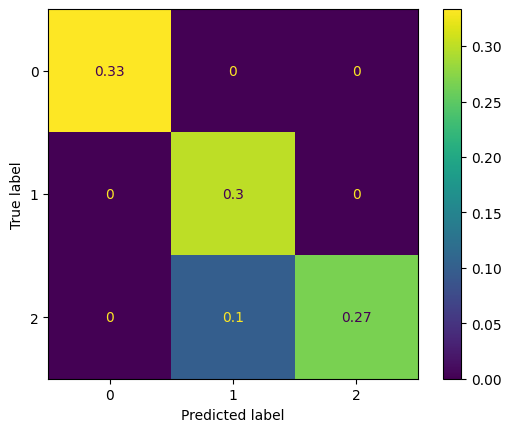

In [14]:
cm_display = ConfusionMatrixDisplay(cm).plot()